In [20]:
import pandas as pd

In [21]:
df = pd.read_csv('CarPrice.csv')
df.head()

,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,max_power (in bph),Mileage Unit,Mileage,Engine (CC)
0,0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,5,74.00,kmpl,23.40,1248
1,2,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,5,90.00,kmpl,23.00,1396
2,4,Hyundai,2017,440000,45000,Petrol,Individual,Manual,First Owner,5,81.86,kmpl,20.14,1197
3,7,Toyota,2011,350000,90000,Diesel,Individual,Manual,First Owner,5,67.10,kmpl,23.59,1364
4,8,Ford,2013,200000,169000,Diesel,Individual,Manual,First Owner,5,68.10,kmpl,20.00,1399


# Data Wrangling

In [22]:
df.drop(columns='Unnamed: 0', inplace=True)

In [23]:
df.isna().sum().sum()

np.int64(0)

In [24]:
df.dropna().head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,max_power (in bph),Mileage Unit,Mileage,Engine (CC)
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,5,74.00,kmpl,23.40,1248
1,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,5,90.00,kmpl,23.00,1396
2,Hyundai,2017,440000,45000,Petrol,Individual,Manual,First Owner,5,81.86,kmpl,20.14,1197


In [25]:
df.drop_duplicates(inplace=True)

In [26]:
df.shape

(2095, 13)

In [27]:
df.dtypes

name                   object
year                    int64
selling_price           int64
km_driven               int64
fuel                   object
seller_type            object
transmission           object
owner                  object
seats                   int64
max_power (in bph)    float64
Mileage Unit           object
Mileage               float64
Engine (CC)             int64
dtype: object

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2095 entries, 0 to 2094
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                2095 non-null   object 
 1   year                2095 non-null   int64  
 2   selling_price       2095 non-null   int64  
 3   km_driven           2095 non-null   int64  
 4   fuel                2095 non-null   object 
 5   seller_type         2095 non-null   object 
 6   transmission        2095 non-null   object 
 7   owner               2095 non-null   object 
 8   seats               2095 non-null   int64  
 9   max_power (in bph)  2095 non-null   float64
 10  Mileage Unit        2095 non-null   object 
 11  Mileage             2095 non-null   float64
 12  Engine (CC)         2095 non-null   int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 212.9+ KB


In [29]:
import seaborn as sns
import matplotlib as plt
from sklearn import preprocessing

<Axes: >

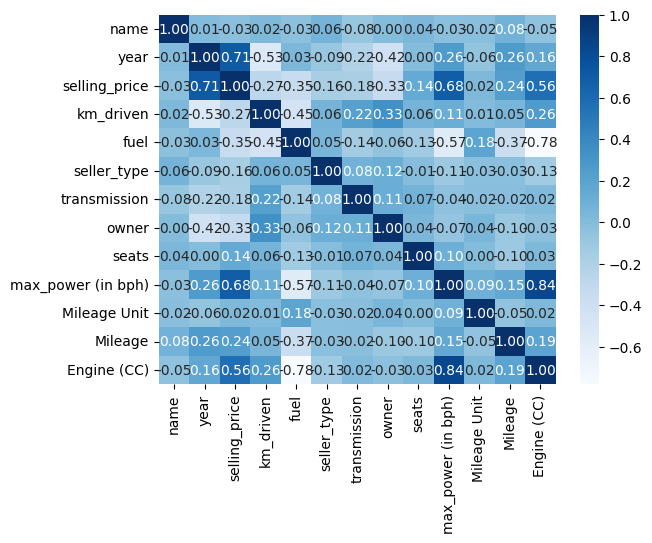

In [30]:
heat_map = df.copy()
heat_map.drop(columns='name')

label_encoder = preprocessing.LabelEncoder()

car_cols = heat_map.columns

for col in car_cols:
    heat_map[col] = label_encoder.fit_transform(heat_map[col])


sns.heatmap(data=heat_map.corr(), cmap='Blues', fmt='.2f', annot=True)

# Machine Learning

In [31]:
company = df.copy()

company_cols = company.drop(columns='name').select_dtypes(include='object').columns

for col in company_cols:
    company[col] = label_encoder.fit_transform(company[col])

In [32]:
company = company[company['selling_price'] > 350000]
company = company[company['Mileage'] >= 20]
company = company[company['max_power (in bph)'] > 70]
company = company[company['km_driven'] > 90000]

In [37]:
X = company.drop(columns='name')
X.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,max_power (in bph),Mileage Unit,Mileage,Engine (CC)
0,2014,450000,145500,1,1,1,0,5,74.00,1,23.40,1248
7,2016,680000,100000,1,1,1,0,5,88.73,1,22.54,1396
21,2013,450000,120000,1,1,1,2,5,74.00,1,22.90,1248
22,2013,450000,170000,1,1,1,0,5,103.60,1,20.54,1598
28,2017,725000,110000,1,1,1,0,5,88.73,1,22.54,1396


In [34]:
y = company['name']
y.head()

0         Maruti
7        Hyundai
21        Maruti
22    Volkswagen
28       Hyundai
Name: name, dtype: object

## Decision Tree Classifier

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model.fit(X_train,y_train)

decision_tree_predict = model.predict(X_test)

decision_tree_predict

array(['Ford', 'Maruti', 'Maruti', 'Maruti', 'Hyundai', 'Hyundai', 'Ford',
       'Hyundai', 'Maruti', 'Hyundai', 'Maruti', 'Hyundai', 'Toyota',
       'Hyundai', 'Volkswagen', 'Hyundai', 'Hyundai', 'Maruti', 'Hyundai',
       'Volkswagen', 'Maruti', 'Ford', 'Toyota', 'Renault', 'Maruti',
       'Maruti', 'Maruti', 'Maruti', 'Maruti', 'Maruti', 'Volkswagen',
       'Hyundai', 'Renault', 'Hyundai', 'Hyundai', 'Maruti', 'Maruti',
       'Maruti', 'Hyundai', 'Maruti'], dtype=object)

In [36]:
accuracy_device = accuracy_score(y_test, decision_tree_predict)
accuracy_device

0.975